## Taller 3 - Modelos de aprendizaje en python
Carlos Gomez - 202111593
<br>
Jeronimo Vargas - 202113305
<br>

In [239]:
# Importar Librerias y datos
import pandas as pd
data = pd.read_csv('real_estate_valuation_data_set.csv', index_col=0)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [240]:
data.shape 

(414, 7)

### Estadisticas Descriptivas

In [241]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Pre-procesamiento

In [242]:
# Preprocesamiento de datos
data.isnull().sum()
# Numero y Eliminar duplicado 
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [243]:
data.shape

(414, 7)

### Analisis exploratorio

In [244]:
import seaborn as sns
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

c:\Users\Jeronimo Vargas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


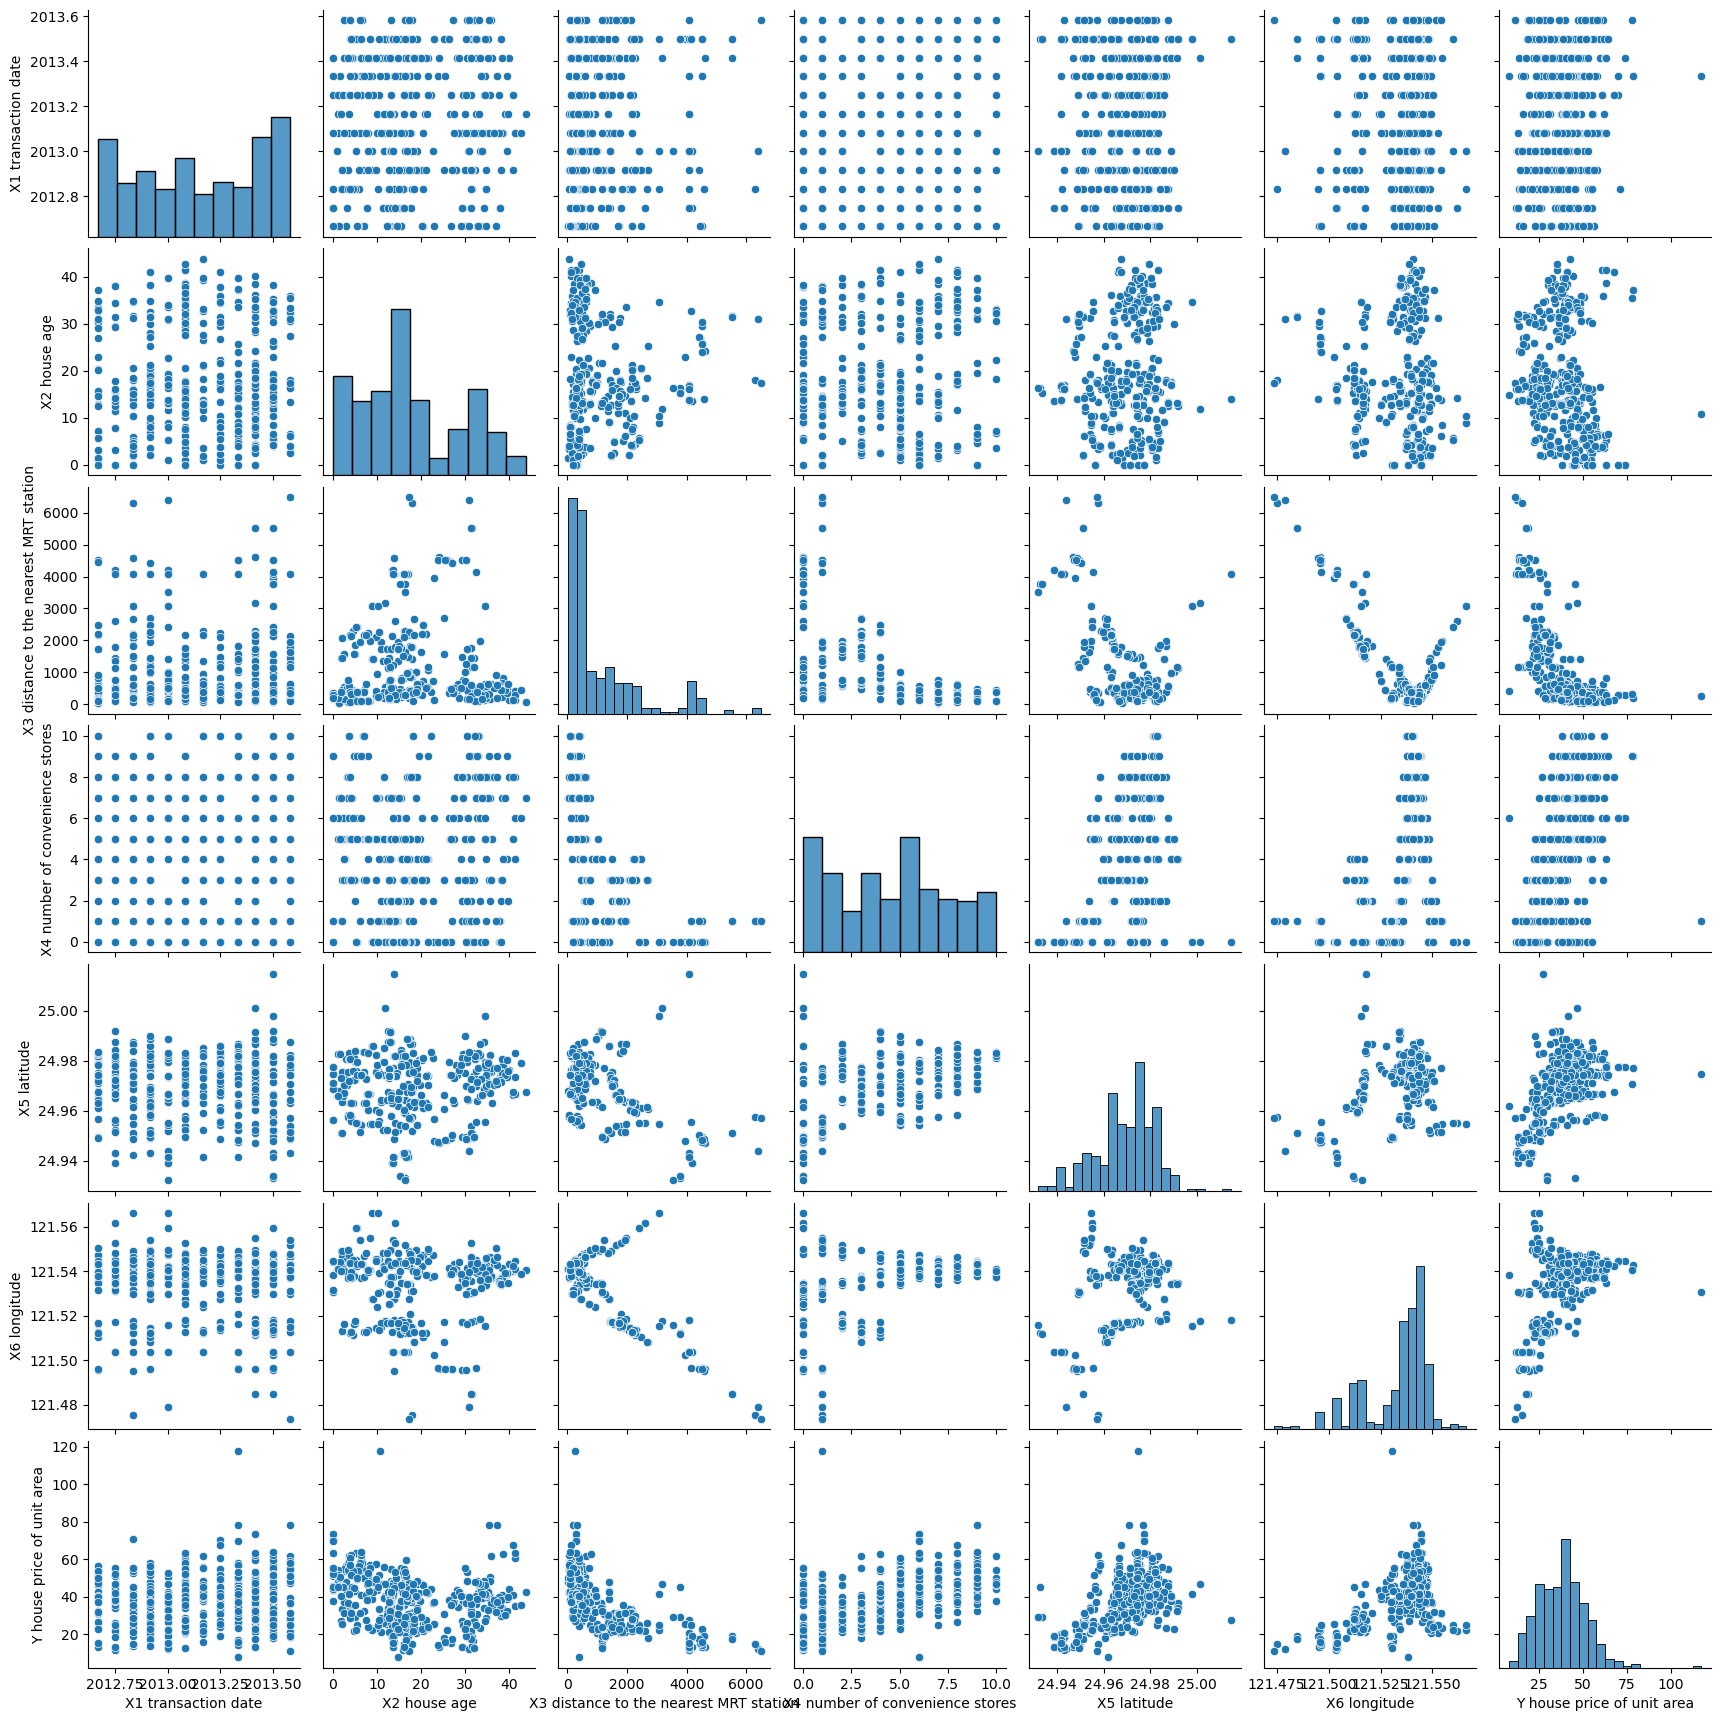

In [245]:
sns.pairplot(data)

### Matriz de correlación

<Axes: >

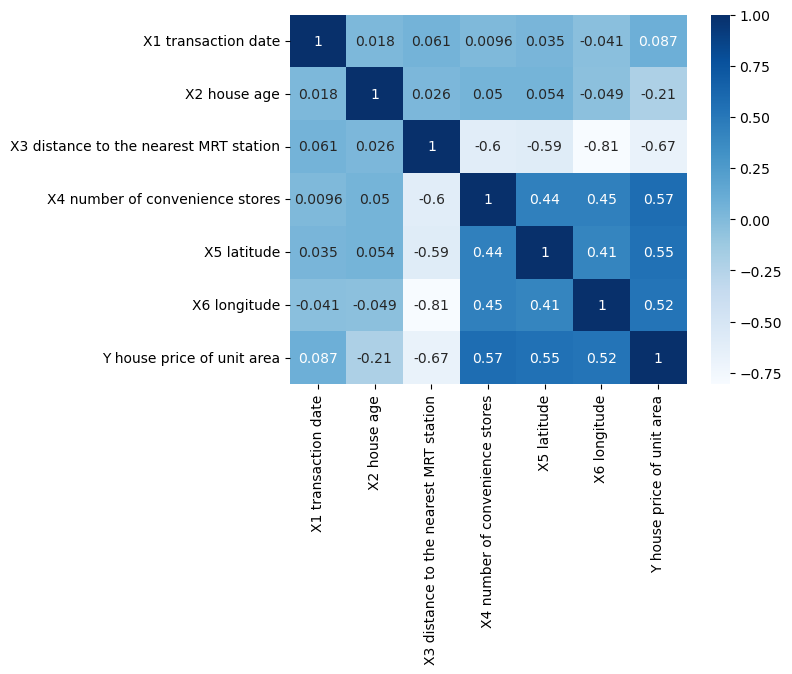

In [246]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

<Axes: >

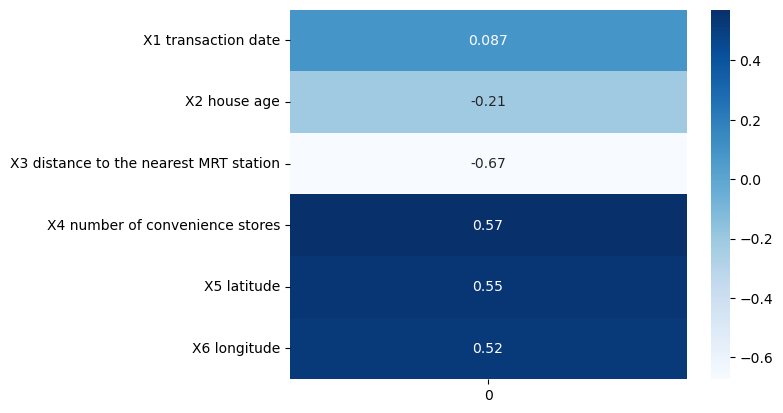

In [247]:
corrw = data.drop(['Y house price of unit area'], axis=1).corrwith(data['Y house price of unit area'])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

c:\Users\Jeronimo Vargas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


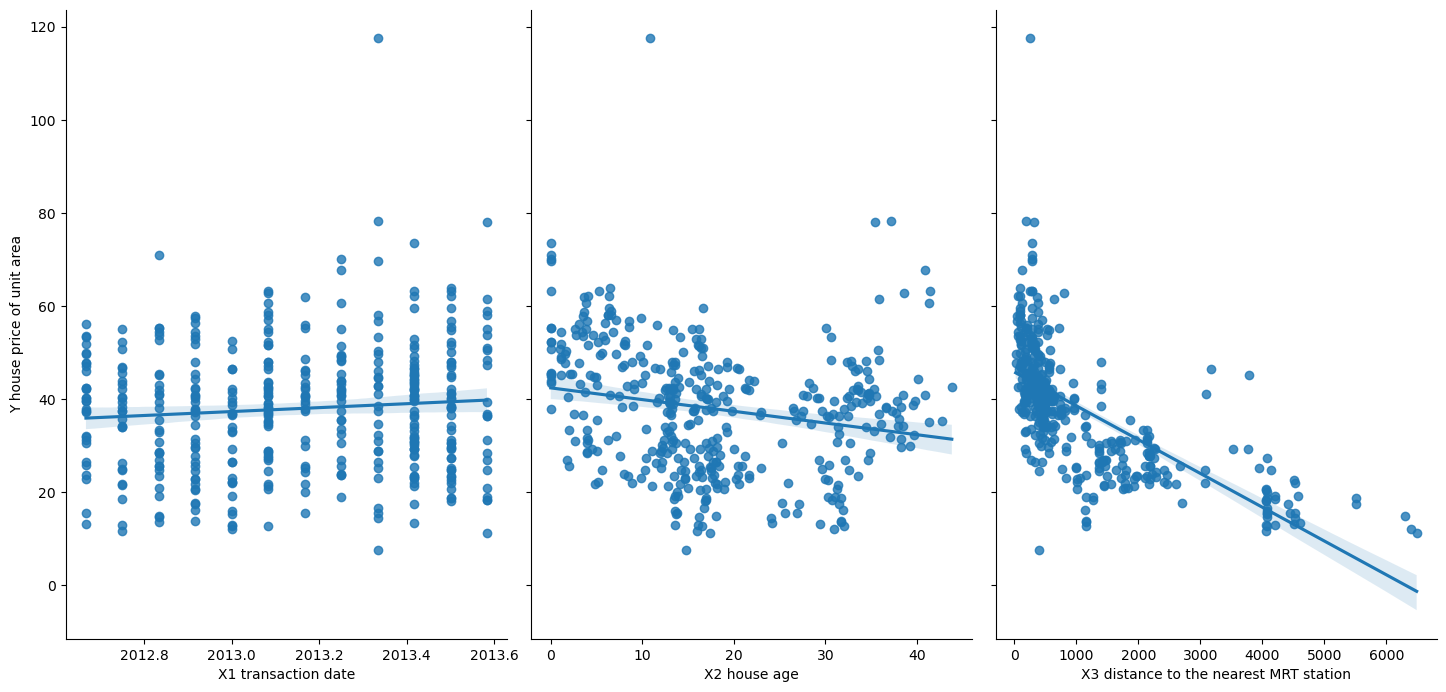

In [248]:
sns.pairplot(data, x_vars=['X1 transaction date' ,'X2 house age' ,'X3 distance to the nearest MRT station'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

c:\Users\Jeronimo Vargas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


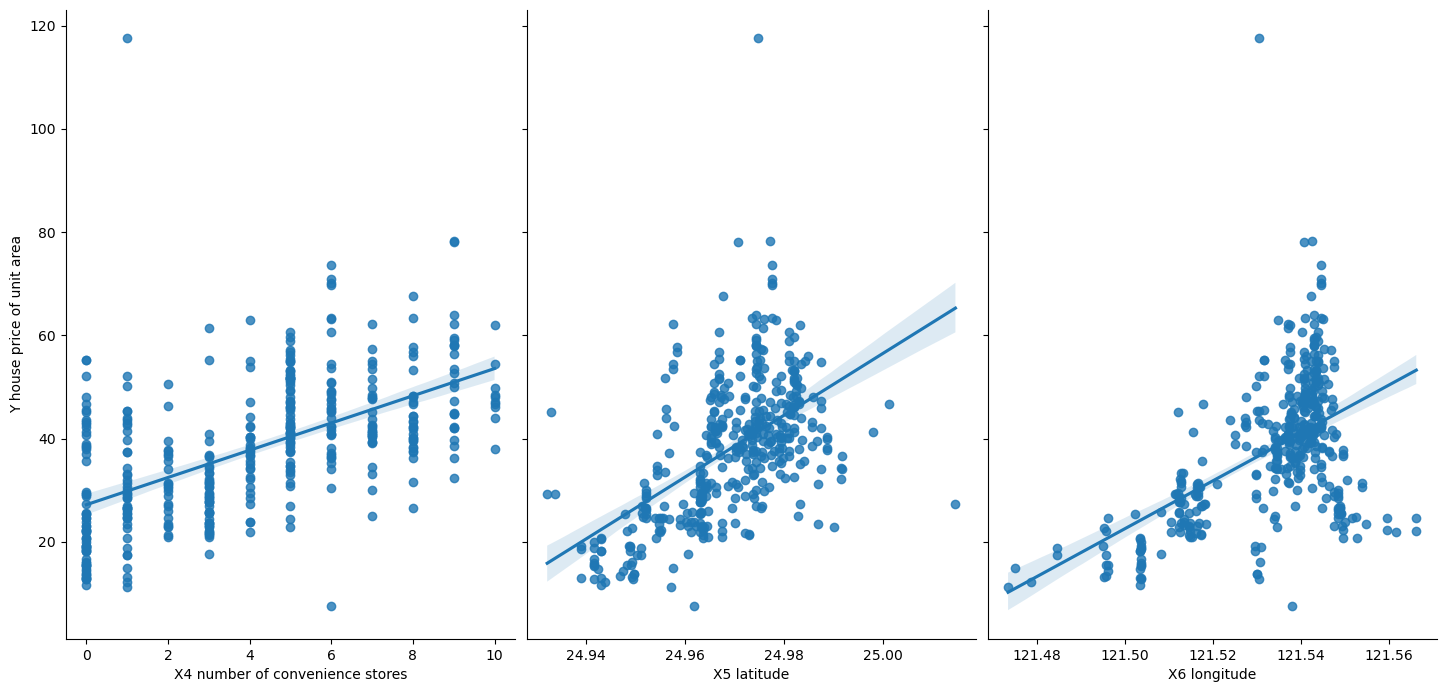

In [249]:
sns.pairplot(data, x_vars=['X4 number of convenience stores','X5 latitude' ,'X6 longitude'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{X1} + \beta_2 \times \text{X2} + \beta_3 \times \text{X3} + \beta_4 \times \text{X4} + \beta_5 \times \text{X5} + \beta_6 \times \text{X6} $

In [250]:
# Variables
for i in data.columns.values:
    print(i)

X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


In [251]:
variables = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

x = data[variables]
y = data['Y house price of unit area']

x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [252]:
y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

### División entre entrenamiento y prueba

In [253]:
import sklearn.model_selection as train_test_split
x_train, x_test, y_train, y_test = train_test_split.train_test_split(x, y, test_size=0.2, random_state=1)

In [254]:
# Tamaños
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 6)
(83, 6)
(331,)
(83,)


### Regresion Lineal

In [255]:
# Modelo RL
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [256]:
# Imprimir coeficientes
print("B0:", model.intercept_)
indice = 1
for i in model.coef_:
    feature = variables[indice-1]  
    print(f"B{indice} ({feature}):", i)
    indice += 1

B0: -12796.117684899318
B1 (X1 transaction date): 5.717142183610287
B2 (X2 house age): -0.24932646689585244
B3 (X3 distance to the nearest MRT station): -0.004937698432023019
B4 (X4 number of convenience stores): 1.076145093445308
B5 (X5 latitude): 227.03710037116494
B6 (X6 longitude): -35.6988334650508


### Predicciones datos de prueba

In [257]:
y_pred = model.predict(x_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [258]:
# Evaluar el modelo
import numpy as np
import sklearn.metrics as metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 5.343030944662901
Mean Squared Error (MSE): 45.01050719519399
Root Mean Squared Error (RMSE): 6.708987046879282
R2: 0.7034608498767342


### Selección de variables - Modelo con otro subconjunto de variables

In [259]:
# Nuevo modelo
variables = ['X1 transaction date', 'X2 house age', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
x = data[variables]
y = data['Y house price of unit area']

# Dividir los datos en conjuntos de entrenamiento y prueba
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,random_state=1)

# Crear un modelo de regresión lineal
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(x_train, y_train)

# Imprimir coeficientes
print("B0:", model.intercept_)
indice = 1
for i in model.coef_:
    feature = variables[indice-1] 
    print(f"B{indice} ({feature}):", i)
    indice += 1

# Realizar predicciones
y_pred = model.predict(x_test)

# Evaluar el modelo
import numpy as np
import sklearn.metrics as metrics
print('\nMean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

B0: -42261.94964941434
B1 (X1 transaction date): 4.4526449216081785
B2 (X2 house age): -0.24313786112927405
B3 (X4 number of convenience stores): 1.5859466946392602
B4 (X5 latitude): 323.5334583136879
B5 (X6 longitude): 207.80803162283962

Mean Absolute Error (MAE): 5.7551839818455575
Mean Squared Error (MSE): 57.4318326003137
Root Mean Squared Error (RMSE): 7.578379285857478
R2: 0.6747340481956856


### Validacion cruzada

In [260]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
print(mse_scores)

[ 55.42517429  95.11164282  61.34058408 145.9619945   72.33960797]


In [261]:
# Calcular RMSE 
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

# RMSE promedio
print(rmse_scores.mean())

[ 7.44480855  9.75251982  7.83202299 12.08147319  8.50526942]
9.123218793799998


### Statsmodels

In [262]:
# Satsmodel
import statsmodels.api as sm

variables = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

x = data[variables]
y = data['Y house price of unit area']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)

x = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()

print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.948
Model:                                    OLS   Adj. R-squared (uncentered):              0.947
Method:                         Least Squares   F-statistic:                              933.0
Date:                        Tue, 20 Aug 2024   Prob (F-statistic):                   1.70e-192
Time:                                22:50:28   Log-Likelihood:                         -1129.8
No. Observations:                         310   AIC:                                      2272.
Df Residuals:                             304   BIC:                                      2294.
Df Model:                                   6                                                  
Covariance Type:                    nonrobust                                                  
                                        

### El segundo modelo, sin X6

In [263]:
import statsmodels.api as sm

variables = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']

x = data[variables]
y = data['Y house price of unit area']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)

x = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train).fit()

print(model.summary())


                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.946
Model:                                    OLS   Adj. R-squared (uncentered):              0.945
Method:                         Least Squares   F-statistic:                              1069.
Date:                        Tue, 20 Aug 2024   Prob (F-statistic):                   6.52e-191
Time:                                22:50:28   Log-Likelihood:                         -1137.1
No. Observations:                         310   AIC:                                      2284.
Df Residuals:                             305   BIC:                                      2303.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                                        

### Determinar la influencia de las observaciones

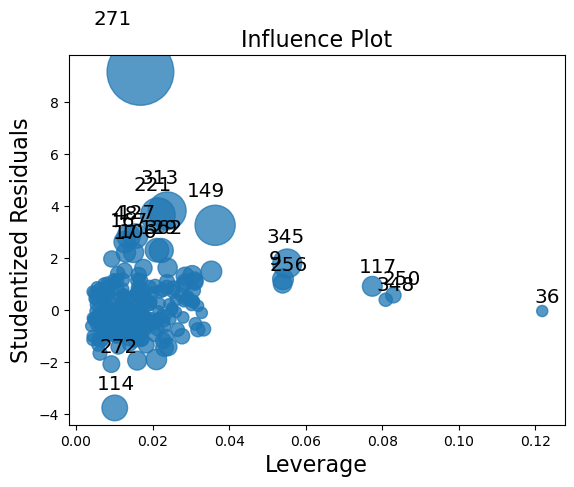

In [264]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [265]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = x_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(x_train.index[out_d], "\n", model_cooksd[out_d])



Umbral con distancia de Cook: 0.012903225806451613
Index([313, 271, 335, 106, 9, 362, 345, 129, 48, 114, 117, 195, 221, 149, 167,
       127],
      dtype='int64', name='No') 
 [0.06800297 0.2254472  0.01536885 0.01472064 0.01600268 0.02352546
 0.03717804 0.02252304 0.02171778 0.02772902 0.01393946 0.01600222
 0.05594446 0.07758837 0.01727689 0.02492941]


In [266]:
x_train.shape

(310, 5)

In [267]:
x_train[out_d]

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude
No,,,,,
313,2013.583,35.4,318.5292,9,24.97071
271,2013.333,10.8,252.5822,1,24.97460
335,2012.917,30.0,1013.3410,5,24.99006
106,2012.833,0.0,292.9978,6,24.97744
9,2013.500,31.7,5512.0380,1,24.95095
362,2013.083,41.4,281.2050,8,24.97345
345,2013.500,34.6,3085.1700,0,24.99800
129,2013.083,41.3,124.9912,6,24.96674
48,2013.583,35.9,640.7391,3,24.97563


In [268]:
y_train[out_d]

No
313     78.0
271    117.5
335     22.8
106     71.0
9       18.8
362     63.3
345     41.2
129     60.7
48      61.5
114      7.6
117     12.2
195     29.3
221     78.3
149     45.1
167     73.6
127     62.9
Name: Y house price of unit area, dtype: float64